# Exercise 3.1: 
Is it enough to insert the given solution into the equation? If not the soulution can be found by applying a Fourier transform to the diffusion equation (4K).
Possible physical interpretaion of h(y): This represents the initial distribution of the substance, as is obvious if the solution is shown using the Fourier transform. 

To show that 

$\phi(x,t) = \frac{1}{\sqrt{4\pi Dt}} \int^{+\infty}_{-\infty}dy\,h(y)e^{-\frac{(x-y)^2}{4Dt}}$

is a solution of

$\frac{\partial \phi(x, t)}{\partial t} = D\frac{\partial^2\phi(x,t)}{\partial^2x}$,

we first calculate

$\frac{\partial \phi(x, t)}{\partial t} = -\frac{1}{2} \frac{1}{\sqrt{4\pi Dt}} \frac{1}{t} \int^{+\infty}_{-\infty}dy\,h(y)e^{-\frac{(x-y)^2}{4Dt}} + \frac{1}{\sqrt{4\pi Dt}} \frac{1}{t^2}\int^{+\infty}_{-\infty}dy\,h(y) \, \frac{(x-y)^2}{4D}e^{-\frac{(x-y)^2}{4Dt}} = \frac{1}{\sqrt{4\pi Dt}}(\frac{1}{t^{2}} \int^{+\infty}_{-\infty}dy\,h(y)\,\frac{(x-y)^2}{4D}e^{-\frac{(x-y)^2}{4Dt}} - \frac{1}{2t} \int^{+\infty}_{-\infty}dy\,h(y)e^{-\frac{(x-y)^2}{4Dt}})$.

Then we find

$\frac{\partial\phi(x,t)}{\partial x} = \frac{1}{\sqrt{4\pi Dt}} (-\frac{1}{4Dt}) \int^{+\infty}_{-\infty}dy\,h(y)\,(2x-2y)e^{-\frac{(x-y)^2}{4Dt}}$

$\implies \frac{\partial^2 \phi(x,t)}{\partial^2 x} = \frac{1}{\sqrt{4\pi Dt}}\frac{1}{4Dt}(-\int^{+\infty}_{-\infty}dy\,h(y)\,2e^{-\frac{(x-y)^2}{4Dt}} + \int^{+\infty}_{-\infty}dy\,h(y)\,\frac{(2x-2y)^2}{4Dt}e^{-\frac{(x-y)^2}{4Dt}}) = \frac{1}{D\sqrt{4\pi Dt}}(\frac{1}{t^{2}} \int^{+\infty}_{-\infty}dy\,h(y)\,\frac{(x-y)^2}{4D}e^{-\frac{(x-y)^2}{4Dt}} - \frac{1}{2t} \int^{+\infty}_{-\infty}dy\,h(y)e^{-\frac{(x-y)^2}{4Dt}})$.

$\implies \frac{\partial \phi(x, t)}{\partial t} = D\frac{\partial^2\phi(x,t)}{\partial^2x}$ $$\tag*{$\blacksquare$}$$.



# Exercise 3.2:
The probability of finding a particle in position $x$ in a potential landscape $V(x)$ is given by $P(x) = Ze^{-\beta V(x)}$, where $Z$ is the canonical partition function of the system and $\beta = (k_b T)^{-1}$.

During a random walk the probability for a particle to move in positive direction, stay put or move in negative direction is, respectively, $\{p^{+}, p^{0}, p^{-}\}$, and the sum of them must add up to one. That means the probabilities must satisfy the equation $p^{+} + p^{0} + p^{-} = 1$. We assume each of the probabilities are proportional to $P(x)$ and that the proportionality constant, $C$, is equal for all steps. If the position before a random walk step is $x_0$ we get $p^{+}=CP(x_0+1)$, $p^{0}=CP(x_0)$ and $p^{-}=CP(x_0-1)$. By putting these expressions in the equation above we find the constant $C=\frac{1}{P(x_0+1)+P(x_0)+P(x_0-1)}$ 
and find the desired probabilities:

$p^{+}=\frac{P(x_0+1)}{P(x_0+1)+P(x_0)+P(x_0-1)} = \frac{1}{1+e^{-\beta [V(x_0-1)-V(x_0+1)]}+e^{-\beta [V(x_0)-V(x_0+1)]}}$

$p^{0}=\frac{P(x_0)}{P(x_0+1)+P(x_0)+P(x_0-1)} = \frac{1}{1+e^{-\beta [V(x_0-1)-V(x_0)]}+e^{-\beta [V(x_0+1)-V(x_0)]}}$

$p^{-}=\frac{P(x_0-1)}{P(x_0+1)+P(x_0)+P(x_0-1)} = \frac{1}{1+e^{-\beta [V(x_0+1)-V(x_0-1)]}+e^{-\beta [V(x_0)-V(x_0-1)]}}$.

# Exercise 3.3:
Use the Taylor series expansion of $e = 1 + x + \frac{x²}{2} + ...$

* I would imagine that a very high temperature makes the probabilties equal. Therefore they should be $\frac13$ each. This makes sense with the Taylor series of $e \approx 1$ when $x<<1$.
* When $x>>1$ the probabilites go towards zero, if I am not mistaken. 

How can the random walk problem be simplified using an energy scale argument in the two limits?
* Limit 1: The difference in potentials when changing x is negligible if the temperature is very large
* Limit 2: If the temperature is very low, the diffusion stops? Absolute zero?

# Warm-up exercises:
* Start with 10000 particles at x = 0
* Each particle is subject to a random walk for 200 time steps
* Step length h = 1
* Time step $\Delta t = 1$

Pick a random number between 0 and 1. Walk in the directions that the probabilities dictate. 

# Programming exercise 4:

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt 
from math import e
import random as rand
from numba import jit

#Lage skikkelige docstrings til alle funksjonene + sjekke at det brukes snake-case i all navngiving! (før innlevering)

# Probabililities from ex. 3 

@jit(nopython=True)
def p_plus(x_0, V, beta_k):
    return 1/(1+e**(-beta_k*(V(x_0-1)-V(x_0+1)))+e**(-beta_k*(V(x_0)-V(x_0+1))))

@jit(nopython=True)
def p_zero(x_0, V, beta_k):
    return 1/(1+e**(-beta_k*(V(x_0-1)-V(x_0)))+e**(-beta_k*(V(x_0+1)-V(x_0))))

@jit(nopython=True)
def p_minus(x_0, V, beta_k):
    return 1/(1+e**(-beta_k*(V(x_0+1)-V(x_0-1)))+e**(-beta_k*(V(x_0)-V(x_0-1))))

#Constants for ex. 4
time_steps = 200
amount_of_particles = 1000  # --- skal egt ha 10 000?
beta_k = [0.01, 1, 100] # betaAndK = one value from the list beta_k
step_length = 1


#Makes Result with a potential V and value betaAndK. 
#@jit(nopython=True)
def get_result(V, betaAndK):
    init = np.zeros((amount_of_particles,), dtype=np.int64)
    for step in range(time_steps):
        for position in range(len(init)):
             
                p = np.random.uniform(0,1)
                if p <= p_minus(init[position],V, betaAndK):
                    init[position] -= 1
                elif p > (1-p_plus(init[position],V, betaAndK)):
                    init[position] += 1
    return init

#Plotting result
def plot_result(result):
  y = np.zeros(((max(result)-min(result))+1,),dtype=np.int64)
  for element in result:
    indeks = int(element-min(result))
    y[indeks] += 1   
  x = np.arange(min(result), max(result)+1, 1)
  plt.plot(x,y, label="Raw data")
  print(x,y)
  #Får ikke til scipy.fit!
  #mean, std = norm.fit(y)
  #pdf = norm.pdf(y, mean, std)
  #plt.plot(x, pdf, label="PDF")
  plt.legend()
  plt.show()

  #fig, axs = plt.subplots(1, 3, figsize=(10, 4), tight_layout=True)
  #axs[0].plot(x,y) #example on how to plot subplots, but need to do some changes to be able to plot all three of them
  #axs[1].plot(x,y) #Maybe hard to do in one general function like this
  #axs[2].plot(x,y)
  #plt.plot(x,y)
  #####plt.plot(x, norm.pdf(y)) #use norm to fit somehow
  #plt.show()

#Burde heller plottes i subplots til senere. 
# Mangler å fitte(!) normalfordelingene + ev. diskusjon rundt resultatene.
def mean(data):
    sum = 0
    for element in data:
        sum += element
    return sum/len(data)

def std(data):
    sum = 0
    mu = mean(data)
    n = len(data)
    for element in data:
        sum += (element-mu)**2
    return np.sqrt(sum/(n-1))

def normal(x,mean,std):
    return 1/(std*np.sqrt(2*np.pi)) * np.e**(-1/2 * ((x-mean)/std)**2)

def plot_hist(result):
  x = np.arange(min(result),max(result),1)
  plt.hist(result, label="normalized particle intensity")
  plt.show()

def plot_normhist(result):
  x = np.arange(min(result),max(result),1)
  plt.hist(result, density = True, label="normalized particle intensity")
  plt.plot(x,normal(x,mean(result),std(result)))
  plt.show()
  print("mean: " + str(mean(result)) + ", std: " + str(std(result)))



```
# This is formatted as code
```

## Programming exercise 4.1:

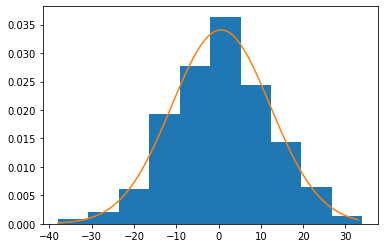

mean: 0.573, std: 11.703745069363432


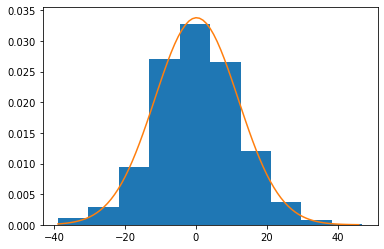

mean: 0.157, std: 11.8052409850335


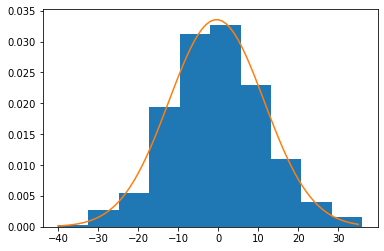

mean: -0.392, std: 11.89048862409445


In [2]:
# Potential number one, the constant k is with betaAndK in getResult
@jit(nopython=True)
def V_1(x):
    return 1

plot_normhist(get_result(V_1,beta_k[0]))
plot_normhist(get_result(V_1,beta_k[1]))
plot_normhist(get_result(V_1,beta_k[2]))
## Ser at grafene til V_1 er uavh. av verdien til betaAndK, altså uavhengig av den termiske energien.
## Det er fordi at å plusse på en konstant til en random walk prosess er bare som å øke den totale energien for alle partiklene og vil ikke endre utfallet av prosessen, men kanskje tiden det tar. 
  

### Discussion 4.1
The resulting distribution of particles is seemingly unaffected by the ratio $\beta k$. This is reasonable, since the potential $V$ is constant, meaning that the particles will not move in any particular direction to minimize their potential energy. We also se that the mathematical probabilites in 3.2 become $p^+ = p^0 = p^- = \frac {1}{3}$ .

Trenger mer teori fra sec. 2???

## Programming exercise 4.2:

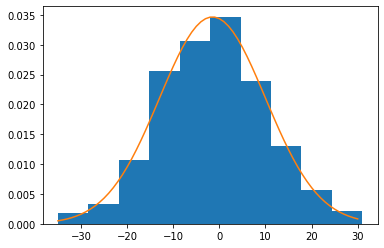

mean: -1.483, std: 11.51000396138901


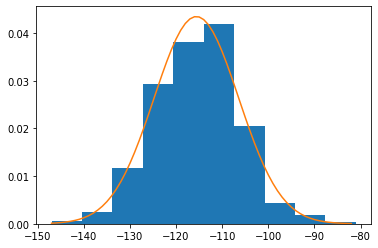

mean: -115.594, std: 9.177766361996547


/home/ajo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:86: RuntimeWarning: divide by zero encountered in double_scalars


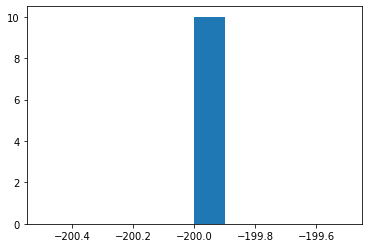

mean: -200.0, std: 0.0


In [3]:
@jit(nopython=True)
def V_2(x):
    return x

plot_normhist(get_result(V_2,beta_k[0]))
plot_normhist(get_result(V_2,beta_k[1]))
plot_normhist(get_result(V_2,beta_k[2]))
#V_2 er en odde funksjon så partiklene vil minimere sn potensielle energi ved å gå mot lav potensiale. 
#Ved betaAndK = 0.01 ser man ikke så mye pga den termiske energien er stor i forhold til potensiale.
#Ved betaAndK = 1 ser man en sterk drifting mot venstre, altså at intensiteten av x-posisjoner er større mot venste og massepunktet forskjøvet.
#Ved betaAndK = 100 er potensialet veldig stort i forhold til den termiske energien og alle partiklene går til posisjon -200, da for å minimere sin potensielle energi.


###Discussion 4.2

## Programming exercise 4.3:


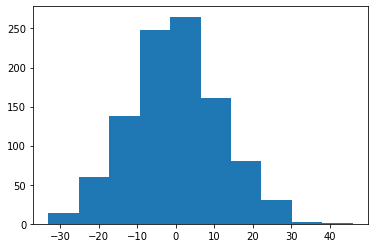

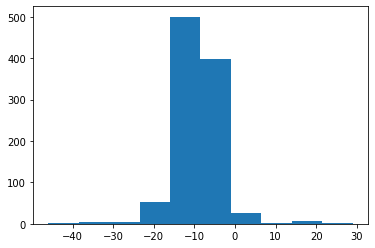

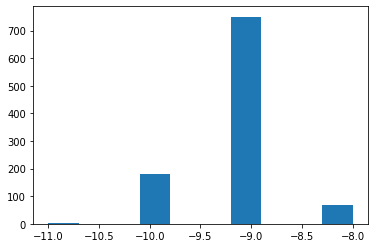

In [4]:
@jit(nopython=True)
def V_3(x):
    return ((x/20)+np.sin(x/5))

plot_hist(get_result(V_3,beta_k[0]))
plot_hist(get_result(V_3,beta_k[1]))
plot_hist(get_result(V_3,beta_k[2]))
#Ved betaAndK = 0.01 er energien for stor og kommer seg opp av "gropene" i potensialet
#Ved betaAndK = 1 faller nesten alle partiklene i første gropen i potensialfunksjonen, da fordi den termiske energien ikke er stor nok til å komme ut. 
##Såpass konsentrert at det danner ish en normalfordeling inni gropen. Er ikke veldig konsentrert i dette tilfelle
#betaAndK = 100; Får ish 3 datapunkter der nesten alle partiklene er nøyaktig på bunnpunktet og de resterende er 1 eller 2 steglengder unna

#Må kjøre 200 steps for beta:k = 0.01 og så 200 steps for beta_k = 100.



##### Discussion 4.3

## Programming exercise 4.4:


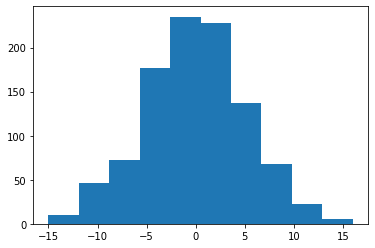

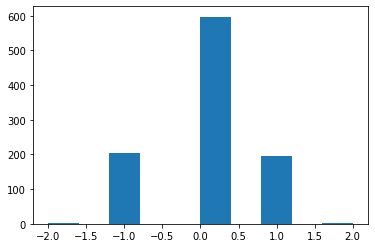

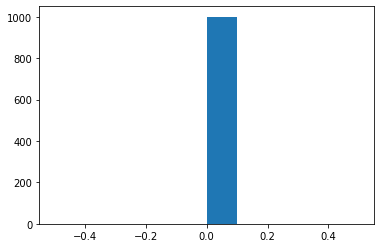

In [5]:
@jit(nopython=True)
def V_4(x):
    return x**2
plot_hist(get_result(V_4,beta_k[0]))
plot_hist(get_result(V_4,beta_k[1])) 
plot_hist(get_result(V_4,beta_k[2]))
#betaAndK = 0.01; Er en jevn-funksjon der det minimale potensiale er i x=0. Her er det litt spredning, men mer konsentrert enn ved konstant potensiale
#betaAndK = 1; Blir bare mer og mer konentrert om x=0
#betaAndK = 100; Blir ett punkt i x=0. Dvs. alle partiklene er i samme posisjon x=0. 

###Discussion 4.4

# 5 Random walk in a ratchet potential

In [6]:
@jit(nopython=True)
def V_sawtooth(x): 
  '''
  V_1(x) from the task-description
  '''
  if not (-(1-alpha)*N_x < x <= alpha*N_x): 
      x = x+N_x #periodicity of the function
  if (0 < x <= alpha*N_x):
      return x/(alpha*N_x) 
  else:
      return -1*(x/((1-alpha)*N_x))  

@jit(nopython=True)  
def V_constant(x):
  '''
  V_2(x) from the task-description. 
  Defined constant c = 1, since the magnitude is
  not important. 
  '''
  c = 1
  return c
  
@jit(nopython=True)
def J(n_plus,n_minus):
  '''
  Normalized particle current. 
  '''
  return (n_plus-n_minus)/N_p

def J_avg(current_list):
  '''
  Calculates the average current per cycle. 
  Returns a cycled average current. 
  '''
  average = sum(current_list)/len(current_list)
  return average
        

## 5.1 Programming exercise 5.1

In [22]:
#Constants
h = 1
alpha = 0.2 
T_p = 500 
delta_t = 1
betaK = 1000
N_x = 90  
N_p = 12*N_x
cycles = 10
jumps = 2*cycles

x_first=-89          
x_last = 90          

@jit(nopython=True)
def p_minus_cycle(x_0, V, beta_k): 
  '''
  p_minus as before, modified for periodic x-axis
  '''
  value = 0
  if x_0 == x_first:
      value = 1/(1+e**(-beta_k*(V(x_0+1)-V(x_last)))+e**(-beta_k*(V(x_0)-V(x_last))))
  elif x_0 == x_last:
      value = 1/(1+e**(-beta_k*(V(x_first)-V(x_0-1)))+e**(-beta_k*(V(x_0)-V(x_0-1))))
  else:
      value = 1/(1+e**(-beta_k*(V(x_0+1)-V(x_0-1)))+e**(-beta_k*(V(x_0)-V(x_0-1))))
  return value

@jit(nopython=True)
def p_plus_cycle(x_0, V, beta_k):
  '''
  p_plus as before, modified for periodic x-axis
  '''
  value = 0
  if x_0 == x_first:
      value = 1/(1+e**(-beta_k*(V(x_last)-V(x_0+1)))+e**(-beta_k*(V(x_0)-V(x_0+1))))
  elif x_0 == x_last:
      value = 1/(1+e**(-beta_k*(V(x_0-1)-V(x_first)))+e**(-beta_k*(V(x_0)-V(x_first))))
  else:
      value = 1/(1+e**(-beta_k*(V(x_0-1)-V(x_0+1)))+e**(-beta_k*(V(x_0)-V(x_0+1))))
  return value

@jit(nopython=True)
def fill_particles(x_first):
  '''
  Makes an array with N_p elements, evenly distributed 
  along the x-axis. Ranges from x_first to x_last. 
  '''
  particles = np.zeros(N_p,dtype = np.int64)
  number = x_first
  for i in range(1,len(particles)+1):
      particles[i-1] = number
      if i%6 == 0:
          number += 1
  return particles

@jit(nopython=True)
def get_current_per_time_step(V, init, time_steps):
    '''
    Calculates currents per time step 
    Returns a list of the currents.
    '''
    current_list_per_time_step = []
    for step in range(time_steps):
        countPos = 0
        countNeg = 0
        for position in range(len(init)):
            p = np.random.uniform(0,1)
            if p <= p_minus_cycle(init[position],V):
                if init[position] == x_first:
                    init[position] = x_last
                else:
                    init[position] -= 1
            countNeg +=1
            elif p > (1-p_plus_cycle(init[position],V)):
                if init[position] == x_last:
                    init[position] = x_first
                else:
                    init[position] += 1
            countPos += 1
        current_list_per_time_step.append(J(countPos, countNeg))
    return current_list_per_time_step

def get_cycle_averaged_current(particles, V1, V2, T_p, jumps):
    '''
    Calculates the cycle-averaged currents. 
    Returns a list of the averaged currents. 
    '''
    average_currents = []
    for i in range(jumps):
        if i%2 == 0:
            currents_per_time_step = get_current_per_time_step(V2,betaK,particles,T_p)
            current_list = currents_per_time_step
        else:
            currents_per_time_step = get_current_per_time_step(V1,betaK,particles,T_p)
            current_list += currents_per_time_step
            average_currents.append(J_avg(current_list))
    return average_currents

particles = fill_particles(x_first) 
print(get_cycle_averaged_current(particles,V_sawtooth, V_constant,T_p, jumps))

SyntaxError: invalid syntax (<ipython-input-22-9d3c0c1db6c7>, line 75)

###Discussion 5.1

* Why we get non-zero currents: 

The potential is not symmetric, which means that there will be a current towards one of the sides. When $\alpha = 0.2$ the potential is "leaning" to the left, which is why we get currents that tend towards the left. 

***Needs to be explained more clearly! (better physical interpretation!)***

* Compare $J_{avg}(0)$ with $J_{avg}(n)$ for n > 0:

It is apparent that the averaged current during the first cycle is bigger than the other cycle-averaged currents. The fact that particles seek to minimize their potential energy can be used to give a physical interpretaion of this observation. The particles are the furthest from the positions of lowest potential in the beginning, when they are uniformly distributed. Therefore, they will move less during each cycle as the numberof cycles increases. Based on this, the first cycle-average current must be the largest of the bunch. However, the currents should decrease monotonically, based on the same logic. This does not happen, as we can see. This could be a result of natural motions/vibrations amongst the paerticles, since they have kinetic energy (Or just Brownian motion?).

***But why don't the rest of the currents decrease monotonically? Is this a consequence of natural vibrations/motion? Temperature? Discuss!***

* Comparison: $\alpha = 0.2$ vs $\alpha = 0.8$:

The potential has the same shape with both these values of $\alpha$, but the entire potential function is flipped by 180 degrees on the x-axis ***Finner ikke bedre ord for dette på engelsk akk nå!***. Therefore, it is expected that the values of the cycle-averaged currents should be equal, but with flipped signs. We can observe that this is/is not the case from the data we simulated. ***Er noe litt rart med strømmene fortsatt, da jeg får omtrent samme verdier uansett alpha (negative verdier)?!*** 

## Programming exercise 5.2

The two x-coordinates which coincide with the minima of $V_1(x)$ must be $x = 0$ and $x = 0 + nN_x$, since it is periodic. The part of $V_1(x)$ which lies within $0 < x \leq \alpha N_x$ is a rising function, which means that it's minima is when $x$ is the smallest $\Rightarrow$ $x = 0$.The other part of $V_1(x)$ is a descending function, which means that it's minima is at the highest possible $x$ value in the interval $\Rightarrow$ x = 0. However, since the potential is periodic, we have one more minima at $x = N_x$. 

In [17]:
def reset_positioning():
  '''
  Places half of the elements at each of the x-coordinates 
  which coincide with the minima of V_sawtooth()
  '''
  particles = np.zeros(N_p,dtype = np.int64)
  for i in range(len(particles)):
    if i < (len(particles)/2):
      particles[i] = 0
    else: 
      particles[i] = N_x 
  return particles


T_p_values = np.linspace(1,500,50)
N_p = 40*N_x
alpha = 0.8

particles = reset_positioning()

for particle in range(len(T_p_values)):
    

[ 0  0  0 ... 90 90 90]


#### Observations: 



## Programming exercise 5.3

In [9]:
T_p = 500
alpha = np.linspace(0,1,50)
N_p = 12*N_x

#### Observations: 

# 6 Analytical solution

## Programming exercise 6.1

## Programming exercise 6.2

## Programming exercise 6.3

## Exercise 6.4